2. Sample demographics
* Gender Breakdown
* Age Distribution
* Income Levels
* Education Levels

✅ Dataset loaded



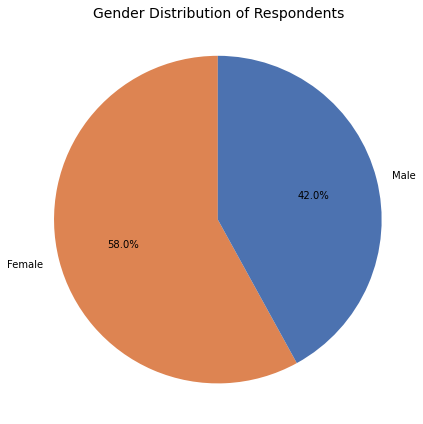

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


# Load the cleaned dataset
df = pd.read_csv("data/cleaned_denim_survey_for_portfolio.csv")
print("✅ Dataset loaded\n")

# Count gender values (assuming 0 = Male, 1 = Female)
gender_counts = df['gender'].value_counts()

# Map numerical values to labels
gender_labels = {0: 'Male', 1: 'Female'}
gender_counts.index = gender_counts.index.map(gender_labels)

# Plotting
plt.figure(figsize=(6, 6))
colors = ['#DD8452','#4C72B0']  # Blue for Male, Orange for Female

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution of Respondents', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures circle shape
plt.tight_layout()
# Show the plot
plt.show()

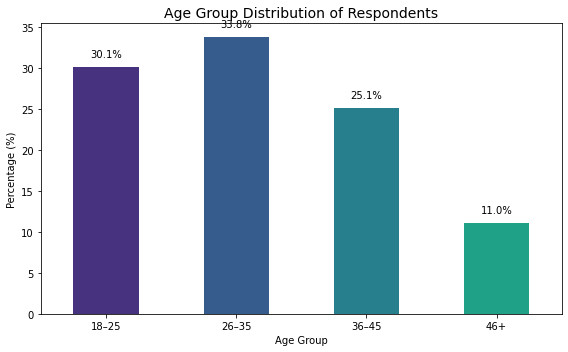

In [3]:
# --- 1. Create age groups ---
bins = [17, 25, 35, 45, 100]
labels = ['18–25', '26–35', '36–45', '46+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# --- 2. Count % per group ---
age_group_counts = df['age_group'].value_counts(normalize=True).sort_index() * 100
age_group_counts = age_group_counts.round(2)

# --- 3. Plot as bar chart ---
age_group_counts.plot(kind='bar', color=sns.color_palette("viridis"), figsize=(8,5))
plt.title('Age Group Distribution of Respondents', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)

# Add percentage labels on top of bars
for i, v in enumerate(age_group_counts):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

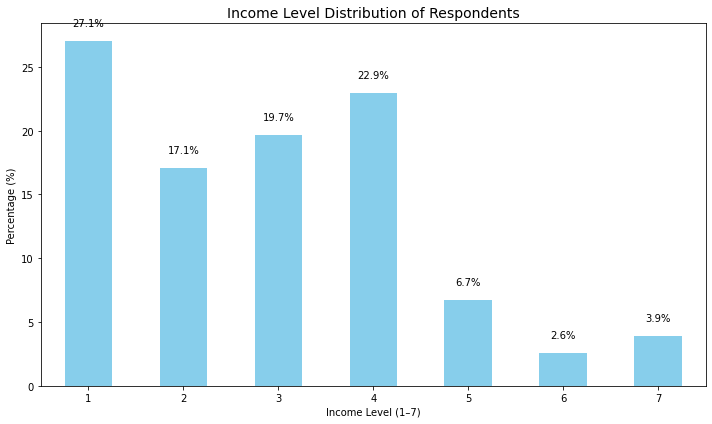

In [4]:
# --- 1. Count % of respondents per income_level ---
income_distribution = df['income_level'].value_counts(normalize=True).sort_index() * 100
income_distribution = income_distribution.round(2)

# --- 2. Plot as simple bar chart ---
income_distribution.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title("Income Level Distribution of Respondents", fontsize=14)
plt.xlabel("Income Level (1–7)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)

# Add percentage labels on top of bars
for i, v in enumerate(income_distribution):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

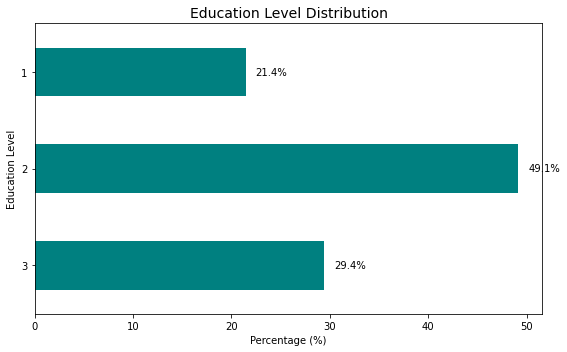

In [5]:
# --- 1. Count % per education level ---
education_distribution = df['education_level'].value_counts(normalize=True).sort_index() * 100
education_distribution = education_distribution.round(2)

# --- 2. Plot as horizontal bar chart ---
education_distribution.plot(kind='barh', color='teal', figsize=(8,5))
plt.title("Education Level Distribution", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Education Level")
plt.gca().invert_yaxis()  # Show highest on top

# Add percentage labels to the right of each bar
for i, v in enumerate(education_distribution):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

**The sample consists of mostly 18-35 aged and low-to-mid income levels, slightly female-dominant, and highly educated consumers.**

3. Denim Jeans Purchase Behavior Overview
* Purchase frequency
* Shopping Channels
* Brand Preferences

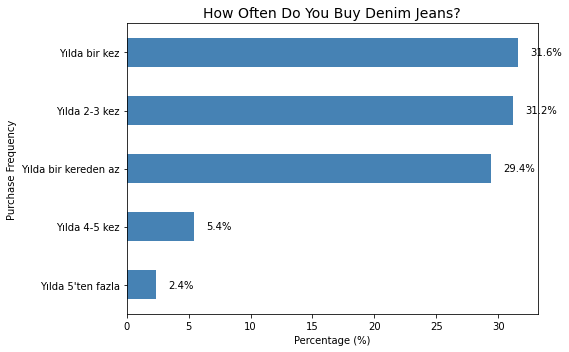

In [6]:
# --- 1. Count % per purchase_frequency ---
purchase_freq = df['purchase_frequency'].value_counts(normalize=True) * 100
purchase_freq = purchase_freq.round(2)

# --- 2. Sort by frequency (from highest to lowest)
purchase_freq_sorted = purchase_freq.sort_values(ascending=False)

# --- 3. Plot as horizontal bar chart ---
purchase_freq_sorted.plot(kind='barh', color='steelblue', figsize=(8,5))
plt.title("How Often Do You Buy Denim Jeans?", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Purchase Frequency")
plt.gca().invert_yaxis()  # Show most frequent at the top

# Add percentage labels to the right of each bar
for i, v in enumerate(purchase_freq_sorted):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

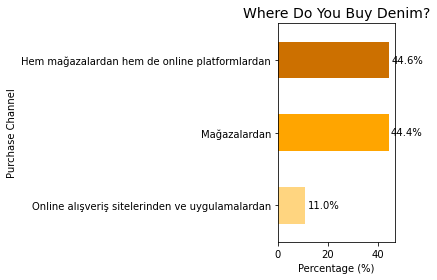

In [7]:
# --- 1. Count % per purchase channel ---
channel_counts = df['purchase_channel'].value_counts(normalize=True) * 100
channel_counts = channel_counts.round(2)

# --- 2. Sort from least to most frequent ---
channel_sorted = channel_counts.sort_values()

# --- 3. Plot as horizontal bar chart with orange colors ---
colors = ['#FFD580', '#FFA500', '#CC7000']  # Light to dark orange

channel_sorted.plot(kind='barh', color=colors, figsize=(6,4))
plt.title("Where Do You Buy Denim?", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Purchase Channel")
plt.xticks(rotation=0)
plt.yticks(fontsize=10)

# Add percentage labels to the right of each bar
for i, v in enumerate(channel_sorted):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

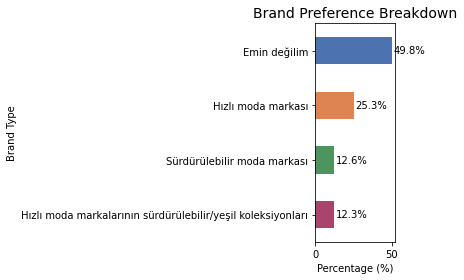

In [8]:
# --- 1. Count % per brand preference ---
brand_counts = df['brand_preference'].value_counts(normalize=True) * 100
brand_counts = brand_counts.round(2)

# --- 2. Sort from least to most frequent ---
brand_sorted = brand_counts.sort_values()

# --- 3. Define correct color mapping in order of sorted index ---
sorted_labels = brand_sorted.index.tolist()

colors = []
for label in sorted_labels:
    if label == 'Emin değilim':
        colors.append('#4C72B0')  # Blue
    elif label == 'Hızlı moda markası':
        colors.append('#DD8452')  # Orange (amber)
    elif label == 'Hızlı moda markalarının sürdürülebilir/yeşil koleksiyonları':
        colors.append('#A9446C')  # Purple-orange (yellow-green if needed)
    elif label == 'Sürdürülebilir moda markası':
        colors.append('#4D945D')  # Green
    else:
        colors.append('gray')  # Fallback color

# --- 4. Plot horizontal bar chart ---
brand_sorted.plot(kind='barh', color=colors, figsize=(6,4))
plt.title("Brand Preference Breakdown", fontsize=14)
plt.xlabel("Percentage (%)")
plt.ylabel("Brand Type")
plt.xticks(rotation=0)
plt.yticks(fontsize=10)

# Add percentage labels to the right of bars
for i, v in enumerate(brand_sorted):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

4. Sustainable Jeans Adoption
* Adoption Rate
* Barriers

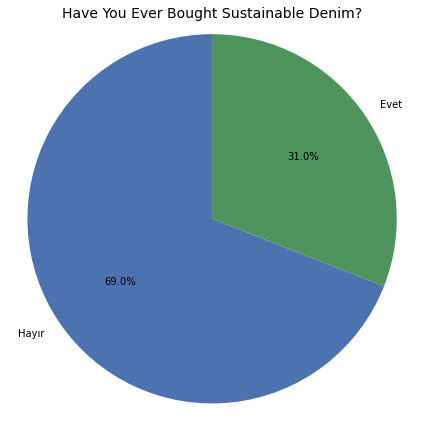

In [9]:
# --- 1. Count how many said "Evet" or "Hayır"
bought_counts = df['sustainable_purchase_history'].value_counts()

# --- 2. Map labels to colors ---
colors = []
for label in bought_counts.index:
    if label == 'Evet':
        colors.append('#4D945D')  # Green for Yes
    elif label == 'Hayır':
        colors.append('#4C72B0')  # Blue for No
    else:
        colors.append('gray')  # Fallback color

# --- 3. Plot pie chart ---
plt.figure(figsize=(6,6))
plt.pie(bought_counts, labels=bought_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
plt.title("Have You Ever Bought Sustainable Denim?", fontsize=14)  # Fixed syntax
plt.axis('equal')  # Equal aspect ratio for circle shape
plt.tight_layout()

# Show chart
plt.show()

In [13]:
# --- Define Barrier Mapping with Short Names ---

barrier_map = {
    "Nereden alabileceğimi bilmiyorum": "lack_of_awareness",
    "Sürdürülebilirlik konusunu önemsemiyorum": "unimportant",
    "Önemsesem de, bir kot pantolonun bu sorunları çözeceğine inanmıyorum": "doubt",
    "Sürdürülebilir kot pantolon diye bir şey ilk defa duyuyorum": "new_concept",
    "Modaya uygun değiller": "unstylish",
    "Alışveriş ve/veya marka alışkanlıklarımı değiştirmek istemiyorum": "habit",
    "Hızlı moda markalarının seçenekleri daha fazla": "lack_of_variety",
    "Kot pantolonun sürdürülebilir olup olmadığını anlamakta zorlanıyorum": "lack_of_knowledge",
    "Çok pahalılar": "expensive",
    "Mağazalarda deneme imkanım yok": "trial_unavailability",
    "Diğer (Lütfen belirtiniz)": "other"
}

# --- Step 2: Identify renamed barrier columns ---
barrier_columns = [
    'barrier_awareness',
    'barrier_unimportant',
    'barrier_doubt',
    'barrier_new_concept',
    'barrier_style',
    'barrier_habit',
    'barrier_variety'
]

# Check if they exist in DataFrame
valid_barrier_columns = [col for col in barrier_columns if col in df.columns]
print("✅ Using these barrier columns:", valid_barrier_columns)

# --- Step 3: Collect all selected values across all rows/columns ---
all_selected = df[valid_barrier_columns].melt()['value'].dropna()

# --- Step 4: Count how many times each mapped barrier appears ---
counts = Counter()
for val in all_selected:
    if val in barrier_map:
        counts[val] += 1
    else:
        print(f"⚠️ Unmatched value: '{val}'")

# Convert to DataFrame
if counts:
    barrier_counts = pd.DataFrame({
        'raw_label': counts.keys(),
        'count': counts.values()
    })

    # Map to short names
    barrier_counts['name'] = barrier_counts['raw_label'].map(barrier_map)

    # Sort by frequency
    barrier_counts.sort_values('count', ascending=False, inplace=True)

    print("\n✅ Final Barrier Frequency:")
    print(barrier_counts[['name', 'count']])
else:
    print("\n❌ No barriers matched — check above for unmatched values")

✅ Using these barrier columns: ['barrier_awareness', 'barrier_unimportant', 'barrier_doubt', 'barrier_new_concept', 'barrier_style', 'barrier_habit', 'barrier_variety']

✅ Final Barrier Frequency:
                    name  count
2      lack_of_awareness    190
6      lack_of_knowledge    121
0            new_concept    115
3              expensive    111
4                  doubt     78
5        lack_of_variety     65
1   trial_unavailability     32
8                  habit     28
9            unimportant     23
7                  other     17
10             unstylish      3


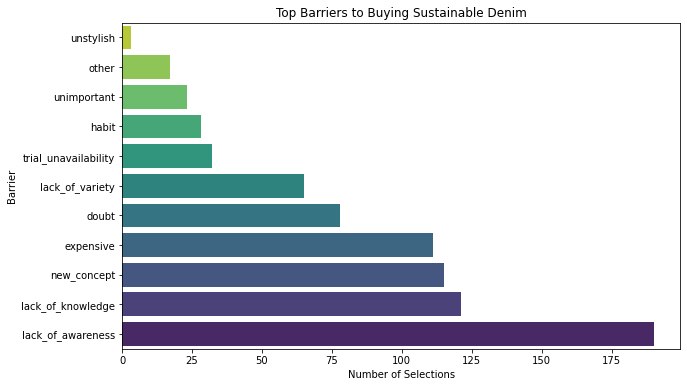

In [14]:
if not barrier_counts.empty:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=barrier_counts, x='count', y='name', palette="viridis")
    plt.title("Top Barriers to Buying Sustainable Denim")
    plt.xlabel("Number of Selections")
    plt.ylabel("Barrier")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("🚫 No barriers to visualize")

**Top barriers to sustainable jeans adoption are related to lack of knowledge and awareness, and high-prices**

5. Demographic Patterns
* Age Segmentation based on purchase behavior
* Gender Segmentation based on purchase behavior

In [ ]:
# --- 1. Crosstabs ---
brand_by_age = pd.crosstab(df['age_group'], df['brand_preference'])
brand_by_age_norm = brand_by_age.div(brand_by_age.sum(axis=1), axis=0) * 100
brand_by_age_norm = brand_by_age_norm[['Hızlı moda markası',
                                       'Hızlı moda markalarının sürdürülebilir/yeşil koleksiyonları',
                                       'Sürdürülebilir moda markası',
                                       'Emin değilim']].round(2)

sus_by_age = pd.crosstab(df['age_group'], df['sustainable_purchase_history'])
sus_by_age_norm = sus_by_age.div(sus_by_age.sum(axis=1), axis=0) * 100
sus_by_age_norm = sus_by_age_norm[['Hayır', 'Evet']].round(2)

freq_by_age = df.groupby('age_group')['purchase_frequency'].value_counts(normalize=True).unstack(fill_value=0).sort_index() * 100
freq_by_age = freq_by_age.round(2)

unsure_by_age = brand_by_age_norm['Emin değilim']

# --- 2. Set up subplots ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Define custom color map
custom_palette = {
    'Hızlı moda markası': '#7C5295',  # Purple
    'Hızlı moda markalarının sürdürülebilir/yeşil koleksiyonları': '#a8d094',  # Light green
    'Sürdürülebilir moda markası': '#3a7c5d',  # Vivid green
    'Emin değilim': '#b0b0b0'  # Soft grey
}

colors = list(custom_palette.values())

# --- Top Left: Brand Preference by Age (Stacked Bar Chart)
brand_by_age_norm.plot(kind='bar', stacked=True, ax=axes[0,0], color=colors)
axes[0,0].set_title("Brand Preference by Age Group (%)")
axes[0,0].set_ylabel("Percentage (%)")
axes[0,0].tick_params(axis='x', rotation=0)
axes[0,0].legend(title="Brand Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Top Right: Sustainable Purchase by Age
sus_by_age_norm.plot(kind='bar', ax=axes[0,1], color=['#4C72B0', '#4D945D'])
axes[0,1].set_title("Sustainable Denim Purchase by Age Group (%)")
axes[0,1].set_ylabel("Percentage (%)")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(['Never Bought', 'Bought'])

# --- Bottom Left: Purchase Frequency by Age
freq_by_age.plot(kind='barh', ax=axes[1,0], color=sns.color_palette("Set2"))
axes[1,0].set_title("Purchase Frequency by Age Group (%)")
axes[1,0].set_xlabel("Percentage (%)")
axes[1,0].invert_yaxis()
axes[1,0].legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Bottom Right: Uncertainty by Age
unsure_by_age.plot(kind='bar', ax=axes[1,1], color='#b0b0b0')
axes[1,1].set_title("Uncertainty in Brand Choice by Age Group (%)")
axes[1,1].set_ylabel("Emin Değilim (%)")
axes[1,1].tick_params(axis='x', rotation=0)

# Final formatting
plt.tight_layout()
plt.show()

In [ ]:

# --- 1. Brand Preference by Age Group (%)
brand_by_age = pd.crosstab(df['age_group'], df['brand_preference'])
brand_by_age_norm = brand_by_age.div(brand_by_age.sum(axis=1), axis=0) * 100
brand_by_age_norm = brand_by_age_norm.round(2)

print("📊 1. Brand Preference by Age Group (%)")
print(brand_by_age_norm)
print("\n" + "-"*50 + "\n")

# --- 2. Sustainable Denim Purchase by Age Group (%)
sus_by_age = pd.crosstab(df['age_group'], df['sustainable_purchase_history'])
sus_by_age_norm = sus_by_age.div(sus_by_age.sum(axis=1), axis=0) * 100
sus_by_age_norm = sus_by_age_norm[['Hayır', 'Evet']].round(2)

print("🧾 2. Sustainable Denim Purchase by Age Group (%)")
print(sus_by_age_norm)
print("\n" + "-"*50 + "\n")

# --- 3. Purchase Frequency by Age Group (%)
freq_by_age = df.groupby('age_group')['purchase_frequency'].value_counts(normalize=True).unstack(fill_value=0) * 100
freq_by_age = freq_by_age.round(2)

print("🛍️ 3. Purchase Frequency by Age Group (%)")
print(freq_by_age)
print("\n" + "-"*50 + "\n")

# --- 4. Uncertainty in Brand Choice by Age Group (%)
unsure_by_age = brand_by_age_norm['Emin değilim']

print("⚠️ 4. Uncertainty in Brand Choice by Age Group (%)")
print(unsure_by_age)
print("\n" + "-"*50 + "\n")

print("✅ All tables exported to /tables/")

**26-35 is the core adoption group -prioritize with tailored education and product positioning**

In [17]:
# --- 1. Brand Preference by Gender ---
print("📊 1. Brand Preference by Gender (% of each group)")
brand_by_gender = pd.crosstab(df['gender'], df['brand_preference'])
brand_by_gender_percent = brand_by_gender.div(brand_by_gender.sum(axis=1), axis=0) * 100
print(brand_by_gender_percent.round(2))
print("\n" + "-"*60 + "\n")

# --- 2. Sustainable Purchase History by Gender ---
print("🧾 2. Ever Bought Sustainable Denim? (%)")
sus_by_gender = pd.crosstab(df['gender'], df['sustainable_purchase_history'])
sus_by_gender_percent = sus_by_gender.div(sus_by_gender.sum(axis=1), axis=0) * 100
print(sus_by_gender_percent.round(2))
print("\n" + "-"*60 + "\n")

# --- 3. Purchase Channel by Gender ---
print("🛍️ 3. Purchase Channel by Gender (%)")
channel_by_gender = pd.crosstab(df['gender'], df['purchase_channel'])
channel_by_gender_percent = channel_by_gender.div(channel_by_gender.sum(axis=1), axis=0) * 100
print(channel_by_gender_percent.round(2))
print("\n" + "-"*60 + "\n")

# --- 4. Purchase Frequency by Gender ---
print("📅 4. How Often Do You Buy Denim? (%)")
freq_by_gender = pd.crosstab(df['gender'], df['purchase_frequency'])
freq_by_gender_percent = freq_by_gender.div(freq_by_gender.sum(axis=1), axis=0) * 100
print(freq_by_gender_percent.round(2))
print("\n" + "-"*60 + "\n")

📊 1. Brand Preference by Gender (% of each group)
brand_preference  Emin değilim  \
gender                           
0                        51.03   
1                        48.88   

brand_preference  Hızlı moda markalarının sürdürülebilir/yeşil koleksiyonları  \
gender                                                                          
0                                                              8.76             
1                                                             14.93             

brand_preference  Hızlı moda markası  Sürdürülebilir moda markası  
gender                                                             
0                              27.84                        12.37  
1                              23.51                        12.69  

------------------------------------------------------------

🧾 2. Ever Bought Sustainable Denim? (%)
sustainable_purchase_history   Evet  Hayır
gender                                    
0                          

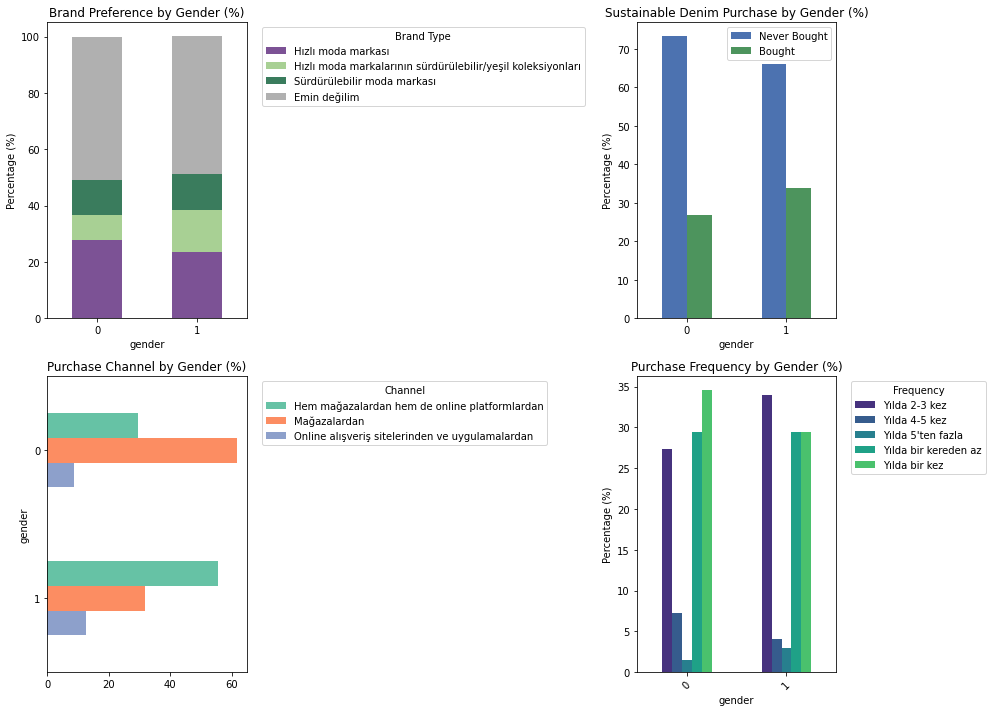

In [16]:
# --- 1. Prepare data ---

# Brand Preference by Gender
brand_by_gender = pd.crosstab(df['gender'], df['brand_preference'])
brand_by_gender_norm = brand_by_gender.div(brand_by_gender.sum(axis=1), axis=0) * 100
brand_by_gender_norm = brand_by_gender_norm[['Hızlı moda markası', 
                                            'Hızlı moda markalarının sürdürülebilir/yeşil koleksiyonları',
                                            'Sürdürülebilir moda markası', 
                                            'Emin değilim']].round(2)

# Sustainable Purchase by Gender
sus_by_gender = pd.crosstab(df['gender'], df['sustainable_purchase_history'])
sus_by_gender_norm = sus_by_gender.div(sus_by_gender.sum(axis=1), axis=0) * 100
sus_by_gender_norm = sus_by_gender_norm[['Hayır', 'Evet']].round(2)

# Purchase Channel by Gender
channel_by_gender = pd.crosstab(df['gender'], df['purchase_channel'])
channel_by_gender_norm = channel_by_gender.div(channel_by_gender.sum(axis=1), axis=0) * 100
channel_by_gender_norm = channel_by_gender_norm.round(2)

# Purchase Frequency by Gender
freq_by_gender = pd.crosstab(df['gender'], df['purchase_frequency'])
freq_by_gender_norm = freq_by_gender.div(freq_by_gender.sum(axis=1), axis=0) * 100
freq_by_gender_norm = freq_by_gender_norm.round(2)

# Define custom colors (same as age group analysis)
custom_palette = {
    'Hızlı moda markası': '#7C5295',  # Purple
    'Hızlı moda markalarının sürdürülebilir/yeşil koleksiyonları': '#a8d094',  # Light Green
    'Sürdürülebilir moda markası': '#3a7c5d',  # Vivid Green
    'Emin değilim': '#b0b0b0'  # Grey
}

colors = list(custom_palette.values())

# --- 2. Set up subplots ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top Left: Brand Preference by Gender (Stacked Bar)
brand_by_gender_norm.plot(kind='bar', stacked=True, ax=axes[0,0], color=colors)
axes[0,0].set_title("Brand Preference by Gender (%)")
axes[0,0].set_ylabel("Percentage (%)")
axes[0,0].tick_params(axis='x', rotation=0)
axes[0,0].legend(title="Brand Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Top Right: Sustainable Denim Purchase by Gender
sus_by_gender_norm.plot(kind='bar', ax=axes[0,1], color=['#4C72B0', '#4D945D'])  # Blue → Green
axes[0,1].set_title("Sustainable Denim Purchase by Gender (%)")
axes[0,1].set_ylabel("Percentage (%)")
axes[0,1].tick_params(axis='x', rotation=0)
axes[0,1].legend(['Never Bought', 'Bought'])

# Bottom Left: Purchase Channel by Gender
channel_by_gender_norm.plot(kind='barh', ax=axes[1,0], color=sns.color_palette("Set2"))
axes[1,0].set_title("Purchase Channel by Gender (%)")
axes[1,0].invert_yaxis()
axes[1,0].legend(title="Channel", bbox_to_anchor=(1.05, 1), loc='upper left')

# Bottom Right: Purchase Frequency by Gender
freq_by_gender_norm.plot(kind='bar', ax=axes[1,1], color=sns.color_palette("viridis"))
axes[1,1].set_title("Purchase Frequency by Gender (%)")
axes[1,1].set_ylabel("Percentage (%)")
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title="Frequency", bbox_to_anchor=(1.05, 1), loc='upper left')

# Final formatting
plt.tight_layout()
plt.show()

**Women are slightly more engaged with sustainability in practice then men.**

6. Sustainability Feature Importance
* Average Importance of Sustainability Features
* Sustainability Feature Importance By Sustainable Jeans Purchase History

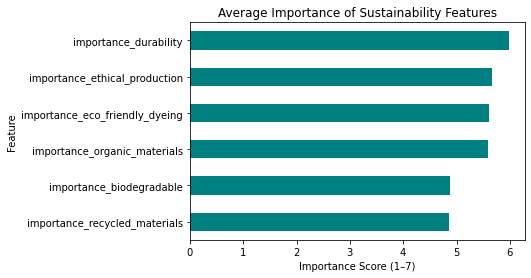

In [21]:
# List of sustainability features
sustainability_features = [
    'importance_durability',
    'importance_organic_materials',
    'importance_recycled_materials',
    'importance_biodegradable',
    'importance_eco_friendly_dyeing',
    'importance_ethical_production'
]

# Calculate average importance scores
feature_means = df[sustainability_features].mean().sort_values(ascending=False)

# Plot as bar chart
feature_means.plot(kind='barh', color='teal')
plt.title("Average Importance of Sustainability Features")
plt.xlabel("Importance Score (1–7)")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()

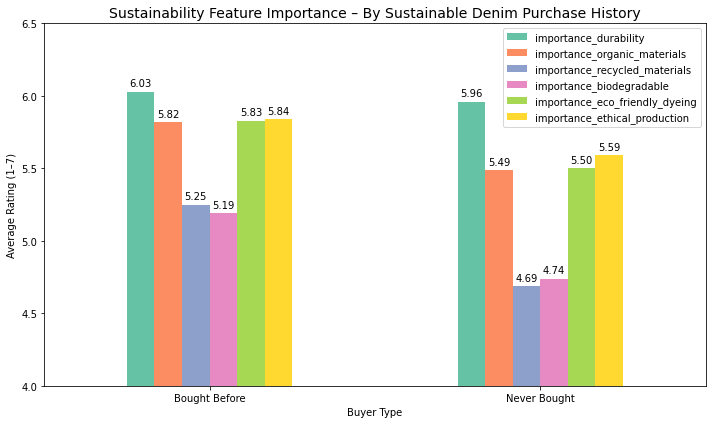

In [19]:
# --- 1. Define buyer groups ---
feature_columns = [
    'importance_durability',
    'importance_organic_materials',
    'importance_recycled_materials',
    'importance_biodegradable',
    'importance_eco_friendly_dyeing',
    'importance_ethical_production'
]

# Group by sustainable_purchase_history and compute average feature importance
features_by_sus_buyer = df.groupby('sustainable_purchase_history')[feature_columns].mean().round(2)

# --- 2. Plot grouped bar chart ---
ax = features_by_sus_buyer.plot(kind='bar', figsize=(10,6), color=sns.color_palette("Set2"))
plt.title("Sustainability Feature Importance – By Sustainable Denim Purchase History", fontsize=14)
plt.ylabel("Average Rating (1–7)")
plt.xlabel("Buyer Type")
plt.xticks(ticks=[0,1], labels=["Bought Before", "Never Bought"], rotation=0)
plt.ylim(4, 6.5)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 8), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

**Most valued feature is durability**